In [1]:
from pathlib import Path

import networkx as nx
import pandas as pd
from sklearn.metrics.pairwise import distance_metrics

from src.num_clusters.elbow_rule import elbow_rule
from src.num_clusters.silhouette_method import silhouette_method
from src.utils import convert_distance_to_similarity
from src.experiment import experiment

In [2]:
x_path = Path('data/X_4_1.xlsx')
y_path = Path('data/Y_4_1.xlsx')

x_data = pd.read_excel(x_path, header=None)
y_data = pd.read_excel(y_path, header=None)

## Distances

- Euclidean
- Cosine


In [3]:
distance_metrics_dict = distance_metrics()

euclidean_distance_func = distance_metrics_dict['euclidean']
cosine_distance_func = distance_metrics_dict['cosine']

In [4]:
euclidean_distance_x = euclidean_distance_func(x_data)
cosine_distance_y = cosine_distance_func(y_data)

euclidean_similarity_x = convert_distance_to_similarity(euclidean_distance_x)
cosine_similarity_y = convert_distance_to_similarity(cosine_distance_y)

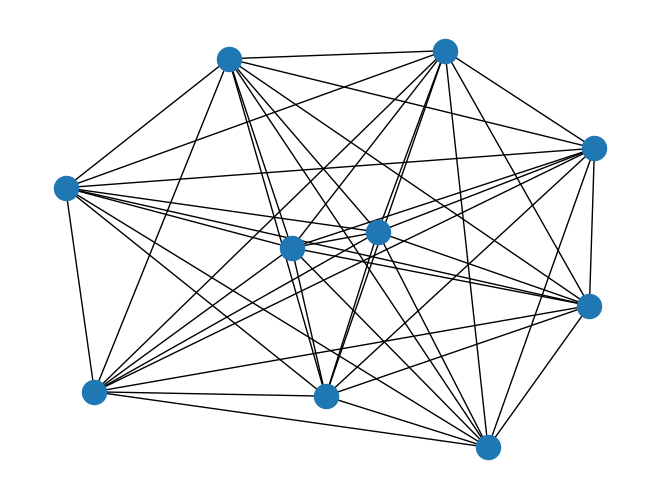

In [5]:
nx.draw(nx.from_numpy_array(cosine_distance_y[:10, :10]))

## Clustering algorithms

- AgglomerativeClustering
- K-Means
- Spectral Clustering
- Gaussian Mixture (EM)

## Experiments with data X

Experiments with Data X

Num Clusters 2
Pairwice RI Score
+--------------------------------+----------------------------------+----------+------------+-----------------------+
|                                |   Agglomerative (single linkage) |   KMeans |   Spectral |   EM Gaussian Mixture |
|--------------------------------+----------------------------------+----------+------------+-----------------------|
| Agglomerative (single linkage) |                         1        | 0.508794 |   0.515628 |              0.513769 |
| KMeans                         |                         0.508794 | 1        |   0.960603 |              0.970302 |
| Spectral                       |                         0.515628 | 0.960603 |   1        |              0.99     |
| EM Gaussian Mixture            |                         0.513769 | 0.970302 |   0.99     |              1        |
+--------------------------------+----------------------------------+----------+------------+-----------------------

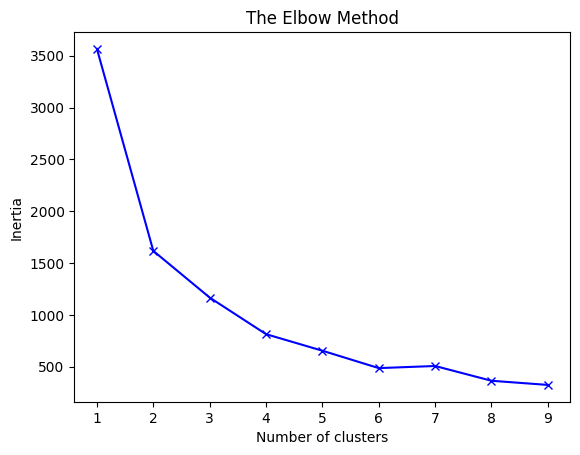

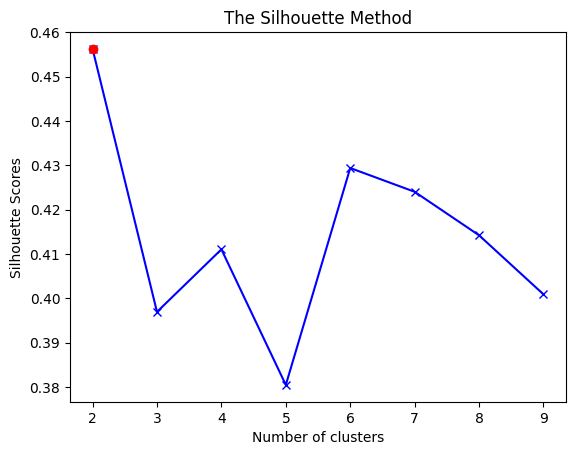

In [6]:
experiment(data=x_data,
           clusters_list=[2,3],
           data_name='Data X',
           linkage='single',
           agglomerative_matrix=euclidean_distance_x,
           similarity_matrix=euclidean_similarity_x)

fig = elbow_rule(x_data, 10)
silhouette_method(x_data, 10)
pass

## Experiments with data Y

Experiments with Data Y

Num Clusters 2
Pairwice RI Score
+----------------------------------+------------------------------------+----------+------------+-----------------------+
|                                  |   Agglomerative (complete linkage) |   KMeans |   Spectral |   EM Gaussian Mixture |
|----------------------------------+------------------------------------+----------+------------+-----------------------|
| Agglomerative (complete linkage) |                           1        | 1        |   1        |              0.608492 |
| KMeans                           |                           1        | 1        |   1        |              0.608492 |
| Spectral                         |                           1        | 1        |   1        |              0.608492 |
| EM Gaussian Mixture              |                           0.608492 | 0.608492 |   0.608492 |              1        |
+----------------------------------+------------------------------------+----------+----

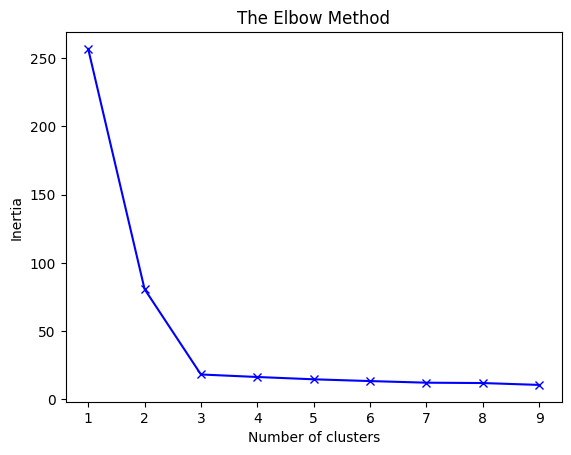

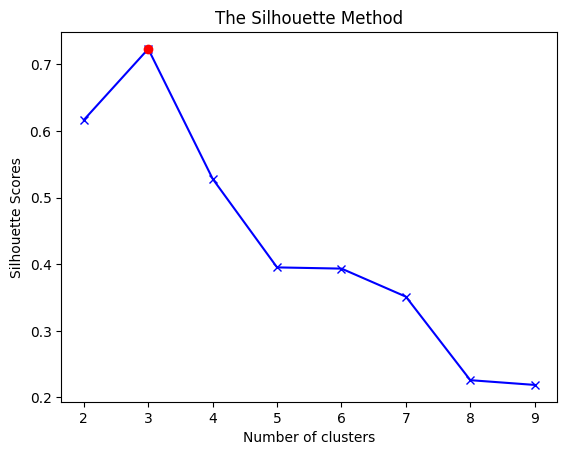

In [7]:
experiment(data=y_data,
           clusters_list=[2,3],
           data_name='Data Y',
           linkage='complete',
           agglomerative_matrix=cosine_distance_y,
           similarity_matrix=cosine_similarity_y)

fig = elbow_rule(y_data, 10)
silhouette_method(y_data, 10)
pass